In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import compress
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
from functools import partial
from qiskit.aqua.components.optimizers import SPSA
from multideterminant_prep import PrepareMultiDeterminantState as pmds
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
get_ipython().run_line_magic('pylab', 'inline')
pylab.rcParams['figure.figsize'] = (12, 6)
pylab.rcParams.update({'font.size': 10})

Populating the interactive namespace from numpy and matplotlib


Preparation of a Multi-Determinant States circuit
---------------------------------------------------------------------

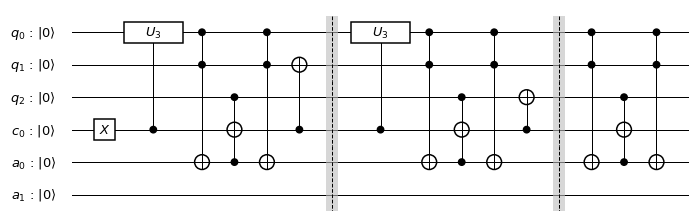

In [3]:
in_strings = ["101", "011", "110"]
in_weights = [4, 7, 2]
circuit = pmds(in_weights, in_strings)
circuit.draw(scale=0.5, style={'fold':100}, output='mpl')

# Configuration
n_shots  = 1000
n_trials = 300
n_layers = 3
n_params = circuit.width() * n_layers * 3

# Build variable bounds
variable_bounds_single = (0., 2*np.pi)
variable_bounds = [variable_bounds_single] * n_params
initial_point = np.random.uniform(low=variable_bounds_single[0],
                                  high=variable_bounds_single[1],
                                  size=(n_params,)).tolist()
circuit.draw(scale=0.5, style={'fold':100}, output='mpl')

In [4]:
print("Circuit has a depth of: {}".format(circuit.depth()))

Circuit has a depth of: 15


Preparation of a shallow approximation circuit in parallel
-------------------------------------------

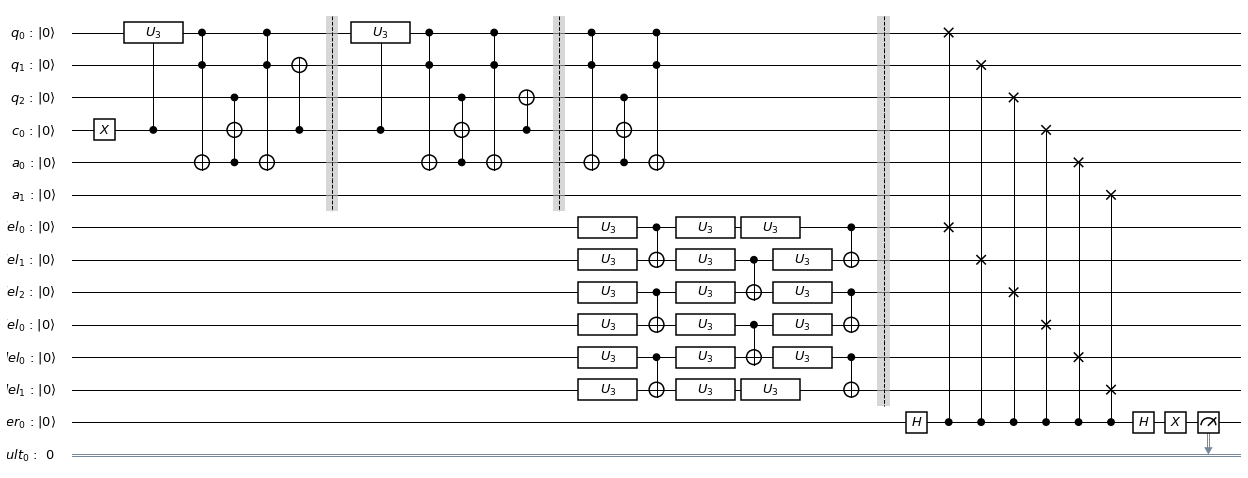

In [5]:
final_circuit = compress.swap_test_with_compression_model(circuit, initial_point)
final_circuit.draw(scale=0.5, style={'fold':100}, output='mpl')

Compute optimal approximation
--------------

In [6]:
results = compress.cross_validate_qnn_depth(circuit, n_shots, n_trials, n_layers, run=0)
results

CRITICAL:root:Fidelity: 0.525
CRITICAL:root:Fidelity: 0.507
CRITICAL:root:Fidelity: 0.525
CRITICAL:root:Fidelity: 0.537
CRITICAL:root:Fidelity: 0.549
CRITICAL:root:Fidelity: 0.516
CRITICAL:root:Fidelity: 0.537
CRITICAL:root:Fidelity: 0.549
CRITICAL:root:Fidelity: 0.52
CRITICAL:root:Fidelity: 0.499
CRITICAL:root:Fidelity: 0.463
CRITICAL:root:Fidelity: 0.494
CRITICAL:root:Fidelity: 0.512
CRITICAL:root:Fidelity: 0.515
CRITICAL:root:Fidelity: 0.528
CRITICAL:root:Fidelity: 0.524
CRITICAL:root:Fidelity: 0.521
CRITICAL:root:Fidelity: 0.52
CRITICAL:root:Fidelity: 0.482
CRITICAL:root:Fidelity: 0.531
CRITICAL:root:Fidelity: 0.512
CRITICAL:root:Fidelity: 0.526
CRITICAL:root:Fidelity: 0.515
CRITICAL:root:Fidelity: 0.51
CRITICAL:root:Fidelity: 0.518
CRITICAL:root:Fidelity: 0.499
CRITICAL:root:Fidelity: 0.506
CRITICAL:root:Fidelity: 0.527
CRITICAL:root:Fidelity: 0.514
CRITICAL:root:Fidelity: 0.521
CRITICAL:root:Fidelity: 0.53
CRITICAL:root:Fidelity: 0.51
CRITICAL:root:Fidelity: 0.54
CRITICAL:root:Fi

CRITICAL:root:Fidelity: 0.649
CRITICAL:root:Fidelity: 0.639
CRITICAL:root:Fidelity: 0.664
CRITICAL:root:Fidelity: 0.684
CRITICAL:root:Fidelity: 0.601
CRITICAL:root:Fidelity: 0.724
CRITICAL:root:Fidelity: 0.688
CRITICAL:root:Fidelity: 0.723
CRITICAL:root:Fidelity: 0.743
CRITICAL:root:Fidelity: 0.689
CRITICAL:root:Fidelity: 0.736
CRITICAL:root:Fidelity: 0.757
CRITICAL:root:Fidelity: 0.741
CRITICAL:root:Fidelity: 0.742
CRITICAL:root:Fidelity: 0.747
CRITICAL:root:Fidelity: 0.75
CRITICAL:root:Fidelity: 0.745
CRITICAL:root:Fidelity: 0.735
CRITICAL:root:Fidelity: 0.75
CRITICAL:root:Fidelity: 0.751
CRITICAL:root:Fidelity: 0.737
CRITICAL:root:Fidelity: 0.757
CRITICAL:root:Fidelity: 0.741
CRITICAL:root:Fidelity: 0.752
CRITICAL:root:Fidelity: 0.739
CRITICAL:root:Fidelity: 0.771
CRITICAL:root:Fidelity: 0.776
CRITICAL:root:Fidelity: 0.786
CRITICAL:root:Fidelity: 0.743
CRITICAL:root:Fidelity: 0.752
CRITICAL:root:Fidelity: 0.752
CRITICAL:root:Fidelity: 0.729
CRITICAL:root:Fidelity: 0.771
CRITICAL:roo

CRITICAL:root:Fidelity: 0.929
CRITICAL:root:Fidelity: 0.934
CRITICAL:root:Fidelity: 0.94
CRITICAL:root:Fidelity: 0.92
CRITICAL:root:Fidelity: 0.932
CRITICAL:root:Fidelity: 0.903
CRITICAL:root:Fidelity: 0.946
CRITICAL:root:Fidelity: 0.951
CRITICAL:root:Fidelity: 0.917
CRITICAL:root:Fidelity: 0.948
CRITICAL:root:Fidelity: 0.93
CRITICAL:root:Fidelity: 0.943
CRITICAL:root:Fidelity: 0.95
CRITICAL:root:Fidelity: 0.95
CRITICAL:root:Fidelity: 0.922
CRITICAL:root:Fidelity: 0.953
CRITICAL:root:Fidelity: 0.961
CRITICAL:root:Fidelity: 0.908
CRITICAL:root:Fidelity: 0.934
CRITICAL:root:Fidelity: 0.923
CRITICAL:root:Fidelity: 0.946
CRITICAL:root:Fidelity: 0.933
CRITICAL:root:Fidelity: 0.926
CRITICAL:root:Fidelity: 0.957
CRITICAL:root:Fidelity: 0.915
CRITICAL:root:Fidelity: 0.934
CRITICAL:root:Fidelity: 0.929
CRITICAL:root:Fidelity: 0.93
CRITICAL:root:Fidelity: 0.908
CRITICAL:root:Fidelity: 0.935
CRITICAL:root:Fidelity: 0.929
CRITICAL:root:Fidelity: 0.943
CRITICAL:root:Fidelity: 0.949
CRITICAL:root:Fi

<xarray.Dataset>
Dimensions:                  (angle: 3, iteration: 300, layer: 3, plusminus: 2, qubit: 6)
Coordinates:
  * iteration                (iteration) int64 0 1 2 3 4 ... 295 296 297 298 299
  * plusminus                (plusminus) int64 0 1
  * layer                    (layer) int64 0 1 2
  * qubit                    (qubit) int64 0 1 2 3 4 5
  * angle                    (angle) <U6 'theta' 'phi' 'lambda'
Data variables:
    fidelity                 (iteration, plusminus) float64 0.497 ... 0.948
    last_theta               (layer, qubit, angle) float64 3.04 5.138 ... 5.586
    uncompiled_target_depth  int64 15
    uncompiled_model_depth   int64 6

Text(0.5, 1.0, 'Fidelity improvement with optimiser iterations')

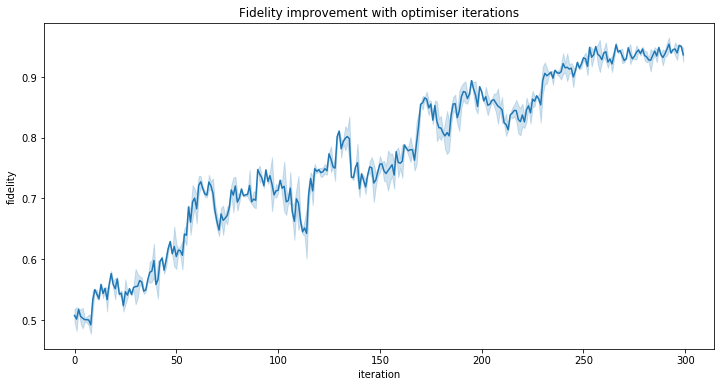

In [12]:
sns.lineplot(x='iteration', y='fidelity', data=results.fidelity.to_dataframe().reset_index())
plt.title("Fidelity improvement with optimiser iterations")